# Problem Statement : To build a classification model which predicts whether the patient has thyroid or not using the training data

# Architecture :  Pipeline for the API

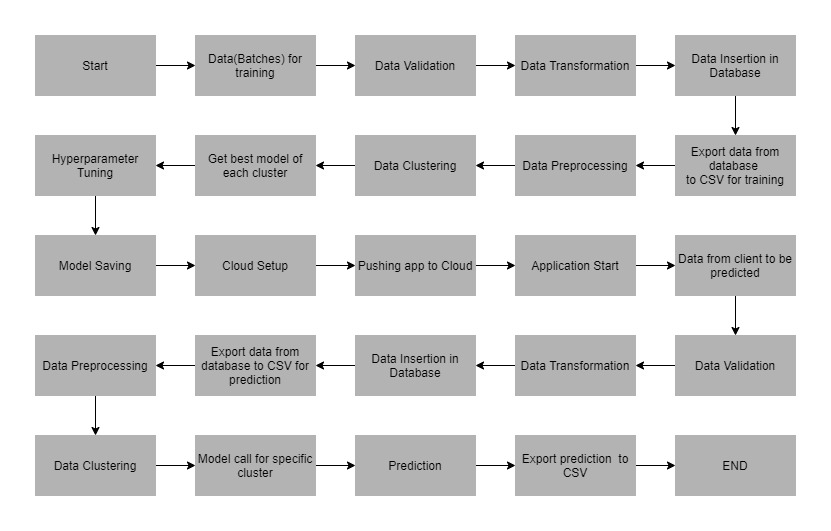

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import logging
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

# Create and configure logger

In [2]:
logging.basicConfig(filename="log.txt",
                    format='%(asctime)s %(message)s',
                    filemode='w')
#Creating an object
logger=logging.getLogger()
#Setting the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)
logger.info("Logging test")

# Importing dataset

In [3]:
logger.info("importing train dataset")
df=pd.read_csv("hypothyroid.csv")
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


# Data Preprocessing

In [4]:
logger.info("data preprocessing in train dataset")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [5]:
df.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


# Converting categorical data columns to binary

In [6]:
logger.info("Converting categorical data columns to binary in train dataset")
def convert(col):
    for i in range(0,len(df[col])):
        if df[col][i]=='?':
            df[col][i]=np.nan
        elif df[col][i] =='F' or df[col][i]=='f' or df[col][i]=='N':
            df[col][i]=int(0)
        elif df[col][i] =='M' or df[col][i]=='t' or df[col][i]=='P':
            df[col][i]=int(1)
    if(col!="referral source"):
        df[col]=df[col].astype('float64')

In [7]:
for x in df.columns:
    convert(x)

c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [8]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,125.0,1.0,1.14,1.0,109.0,0.0,NaN,SVHC,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,102.0,0.0,NaN,0.0,NaN,0.0,NaN,other,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,109.0,1.0,0.91,1.0,120.0,0.0,NaN,other,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,175.0,0.0,NaN,0.0,NaN,0.0,NaN,other,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,61.0,1.0,0.87,1.0,70.0,0.0,NaN,SVI,1.0


In [9]:
df.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

# Dropping redundant and unwanted columns

In [10]:
logger.info("Dropping redundant and unwanted columns in train dataset")
del df['TBG']
del df['TBG measured']
del df['TSH measured']
del df['T3 measured']
del df['T4U measured']
del df['FTI measured']
del df['TT4 measured']

# Handling missing data using KNN imputer 

In [11]:
logger.info("Handling missing data using KNN imputer in train dataset")
imputer = KNNImputer(n_neighbors=5)
df['age']=imputer.fit_transform(np.array(df['age']).reshape(-1, 1))
df['sex']=imputer.fit_transform(np.array(df['sex']).reshape(-1, 1))
df['TSH']=imputer.fit_transform(np.array(df['TSH']).reshape(-1, 1))
df['T3']=imputer.fit_transform(np.array(df['T3']).reshape(-1, 1))
df['T4U']=imputer.fit_transform(np.array(df['T4U']).reshape(-1, 1))
df['FTI']=imputer.fit_transform(np.array(df['FTI']).reshape(-1, 1))
df['TT4']=imputer.fit_transform(np.array(df['TT4']).reshape(-1, 1))

# Encoding Categorical Data

In [12]:
logger.info("Encoding Categorical Data in train dataset")
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['referral source'])
print(integer_encoded)

[1 4 4 ... 4 3 4]


In [13]:
# binary encode
onehot_encoder = OneHotEncoder(drop="first",sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [14]:
df['referral source1']=onehot_encoded[:,0]
df['referral source2']=onehot_encoded[:,1]
df['referral source3']=onehot_encoded[:,2]
df['referral source4']=onehot_encoded[:,3]
del df['referral source']
temp=df['binaryClass']
del df['binaryClass']
df['output']=temp

In [15]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3,TT4,T4U,FTI,referral source1,referral source2,referral source3,referral source4,output
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.30,2.5000,125.0,1.140,109.000000,1.0,0.0,0.0,0.0,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.10,2.0000,102.0,0.995,110.469649,0.0,0.0,0.0,1.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.98,2.0135,109.0,0.910,120.000000,0.0,0.0,0.0,1.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,1.9000,175.0,0.995,110.469649,0.0,0.0,0.0,1.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.72,1.2000,61.0,0.870,70.000000,0.0,0.0,1.0,0.0,1.0


# Exploratory Data Analysis

<AxesSubplot:>

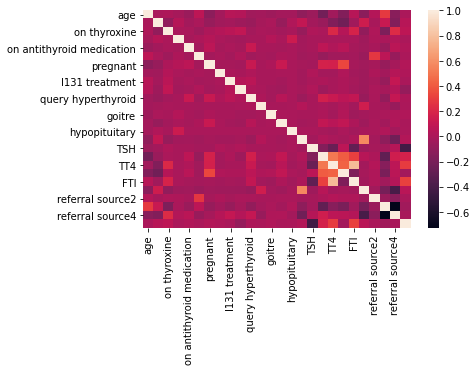

In [16]:
logger.info("Exploratory Data Analysis in train dataset")
sns.heatmap(df.corr())

#  Checking for skewed data

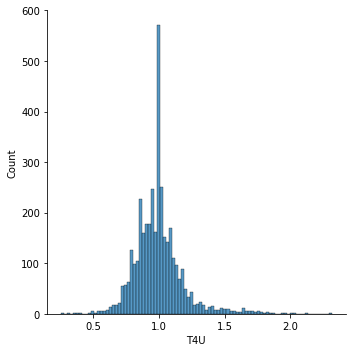

In [17]:
logger.info("Checking for skewed data in train dataset")
sns.displot(df['T4U'])

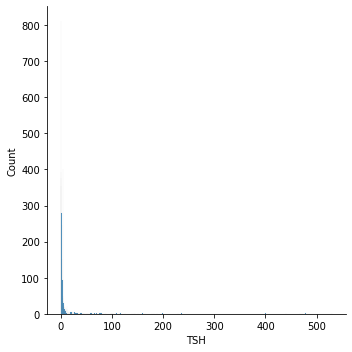

In [18]:
sns.displot(df['TSH'])

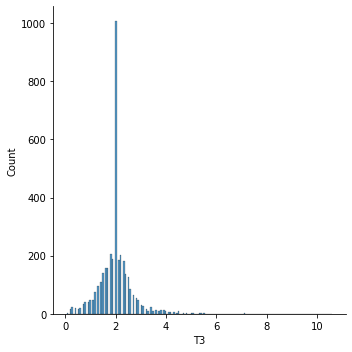

In [19]:
sns.displot(df['T3'])

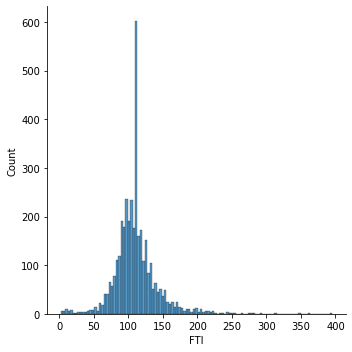

In [20]:
sns.displot(df['FTI'])

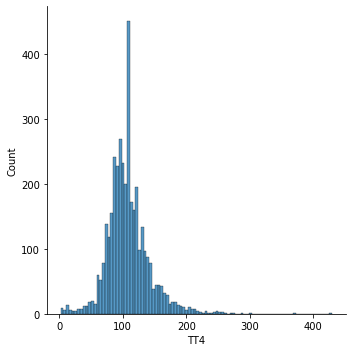

In [21]:
sns.displot(df['TT4'])

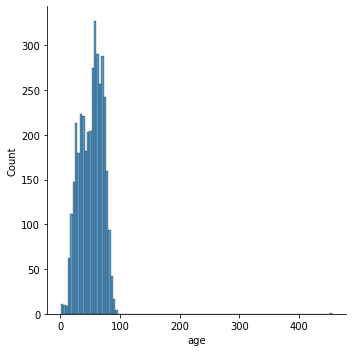

In [22]:
sns.displot(df['age'])

# Feature Scaling

In [23]:
logger.info("Feature Scaling in train dataset")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
print(X)

[[41.  0.  0. ...  0.  0.  0.]
 [23.  0.  0. ...  0.  0.  1.]
 [46.  1.  0. ...  0.  0.  1.]
 ...
 [74.  0.  0. ...  0.  0.  1.]
 [72.  1.  0. ...  0.  1.  0.]
 [64.  0.  0. ...  0.  0.  1.]]


In [25]:
print(y)

[1. 1. 1. ... 1. 1. 1.]


In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Normalizing Data

In [27]:
logger.info("Normalizing Data in train dataset")
X = preprocessing.normalize(X)

# Imbalanced Data

<AxesSubplot:ylabel='count'>

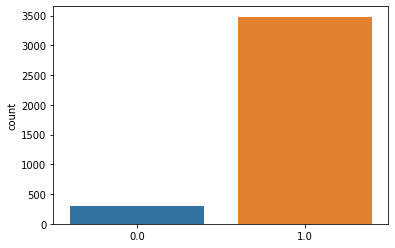

In [28]:
logger.info("Imbalanced Data in train dataset")
sns.countplot(x=y,data=df)

In [29]:
ros = RandomOverSampler(random_state=42)
X , y  = ros.fit_resample(X, y)

c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

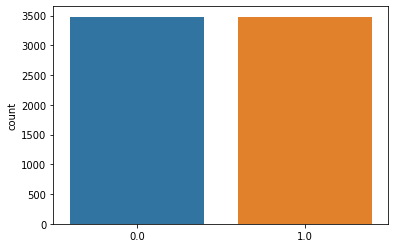

In [30]:
sns.countplot(y)

# **Data Clustering**

In [31]:
logger.info("Data Clustering in train dataset")


# **Finding Number of clusters using elbow method**

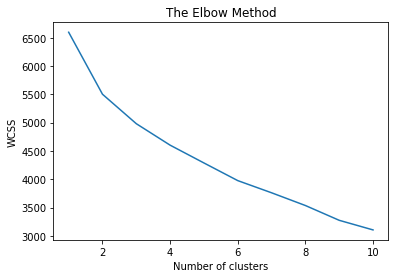

In [32]:
logger.info("Finding Number of clusters using elbow method in train dataset")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# **Training the K-Means model on the dataset**

In [33]:
logger.info("Training the K-Means model on the dataset in train dataset")
num_of_clusters=3
kmeans = KMeans(n_clusters = num_of_clusters, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit(X)

# **Adding clusters to the dataframe**

In [34]:
logger.info("Adding clusters to the dataframe in train dataset")
df1 = pd.DataFrame(X)
df1.columns=['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'referral source1', 'referral source2', 'referral source3',
       'referral source4']

In [35]:
df1['Clusters']=kmeans.labels_
df1['output']=y

In [36]:
df1.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4,T4U,FTI,referral source1,referral source2,referral source3,referral source4,Clusters,output
0,-0.147656,-0.191244,-0.103430,-0.032009,-0.029656,-0.055613,-0.032968,-0.032968,-0.034812,-0.071023,...,1.820115e-01,0.133556,2.163000e-01,-0.012946,0.817935,-0.028227,-0.169712,-0.326882,1,1.0
1,-0.693852,-0.335751,-0.181583,-0.056195,-0.052064,-0.097634,-0.057879,-0.057879,-0.061117,-0.124689,...,-8.866940e-03,-0.088829,-2.907551e-16,0.000000,-0.163700,-0.049557,-0.297949,0.409615,2,1.0
2,-0.136669,0.719501,-0.179186,-0.055453,-0.051377,-0.096346,-0.057115,-0.057115,-0.060310,-0.123043,...,2.878356e-16,0.009441,-2.196663e-01,0.145441,-0.161539,-0.048902,-0.294016,0.404208,1,1.0
3,0.244919,-0.186465,0.718957,-0.031209,-0.028915,-0.054223,-0.032144,-0.032144,-0.033942,-0.069248,...,-4.140199e-02,0.520549,-1.614760e-16,0.000000,-0.090914,-0.027522,-0.165471,0.227487,1,1.0
4,0.271678,-0.206838,-0.111863,-0.034619,-0.032074,-0.060147,-0.035656,-0.035656,-0.037651,-0.076814,...,-3.291671e-01,-0.409763,-2.016693e-01,-0.385559,-0.100847,-0.030529,0.486036,-0.353536,0,1.0


# **Visualizing the clusters**

<AxesSubplot:xlabel='age', ylabel='TSH'>

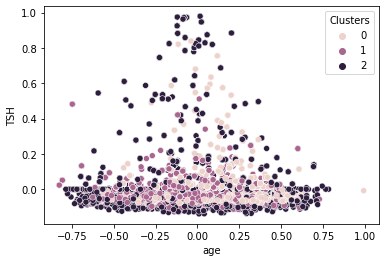

In [37]:
logger.info("Visualizing the clusters in train dataset")
sns.scatterplot(x='age',y='TSH',hue='Clusters',data=df1)

<AxesSubplot:xlabel='age', ylabel='T3'>

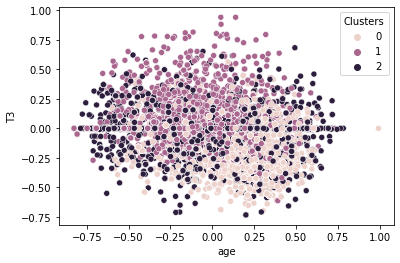

In [38]:
sns.scatterplot(x='age',y='T3',hue='Clusters',data=df1)

<AxesSubplot:xlabel='age', ylabel='FTI'>

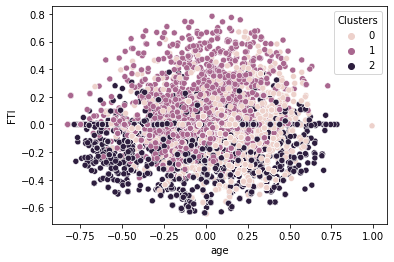

In [39]:
sns.scatterplot(x='age',y='FTI',hue='Clusters',data=df1)

<AxesSubplot:xlabel='age', ylabel='T4U'>

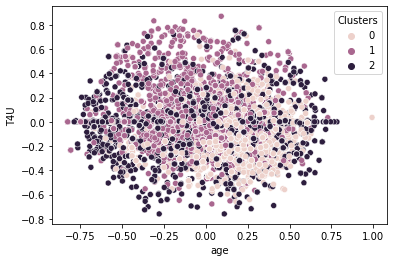

In [40]:
sns.scatterplot(x='age',y='T4U',hue='Clusters',data=df1)

<AxesSubplot:xlabel='age', ylabel='TT4'>

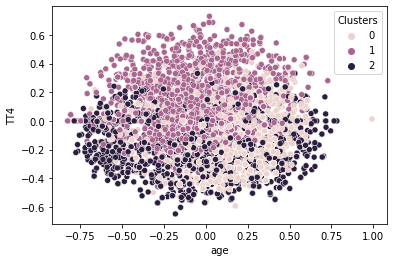

In [41]:
sns.scatterplot(x='age',y='TT4',hue='Clusters',data=df1)

c:\users\rohit\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Clusters', ylabel='count'>

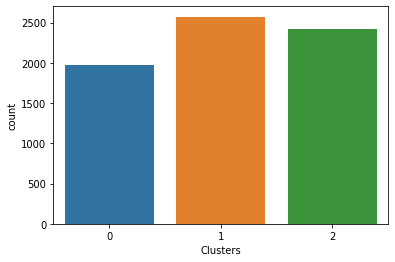

In [42]:
sns.countplot(df1['Clusters'])

# **Model Selection : Random forest VS Naive Bayes VS SVC**

In [43]:
logger.info("Model Selection : Random forest VS Naive Bayes VS SVC in train dataset")

In [44]:
for i in range(0,num_of_clusters):
    temp_df=df1[df1['Clusters']==i]
    del temp_df['Clusters']
    temp_X = temp_df.iloc[:, :-1].values
    temp_y = temp_df.iloc[:, -1].values
    #splitting the data into train and test set
    X_train, X_test, y_train, y_test = train_test_split(temp_X,temp_y, test_size=0.33, random_state=42)
    #using Random Forest classifier 
    clf = RandomForestClassifier(max_depth=10, random_state=0)
    #hyper parameter tuning
    # Choose some parameter combinations to try
    parameters = {'n_estimators': [4, 6, 9], 
                    'max_features': ['log2', 'sqrt','auto'], 
                    'criterion': ['entropy', 'gini'],
                    'max_depth': [2, 3, 5, 10], 
                    'min_samples_split': [2, 3, 5],
                    'min_samples_leaf': [1,5,8]
                  }
    # Type of scoring used to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the clf to the best combination of parameters
    clf = grid_obj.best_estimator_
    # Fit the best algorithm to the data. 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #using ROC-AUC score as a evaluation metric
    clf_score=roc_auc_score(y_test,y_pred)
    print("ROC-AUC score of Random Forest Classifier for Cluster "+str(i)+" : ", clf_score)
    #using Naive Bayes classifier 
    gnb = GaussianNB()
    #hyper parameter tuning
    # Choose some parameter combinations to try
    parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
    # Type of scoring used to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)
    # Run the grid search
    grid_obj = GridSearchCV(gnb, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the clf to the best combination of parameters
    gnb = grid_obj.best_estimator_
    # Fit the best algorithm to the data.
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    #using ROC-AUC score as a evaluation metric
    gnb_score=roc_auc_score(y_test,y_pred)
    print("ROC-AUC score of Naive Bayes Classifier for Cluster "+str(i)+" : ", gnb_score)
    #using Support Vector classifier 
    svc = SVC(kernel = 'linear', random_state = 0)
    #hyper parameter tuning
    # Choose some parameter combinations to try
    parameters = {'C': [0.1, 1, 10, 100, 1000], 
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}
    # Type of scoring used to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)
    # Run the grid search
    grid_obj = GridSearchCV(svc, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X_train, y_train)
    # Set the clf to the best combination of parameters
    svc = grid_obj.best_estimator_
    # Fit the best algorithm to the data.
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    #using ROC-AUC score as a evaluation metric
    svc_score=roc_auc_score(y_test,y_pred)
    print("ROC-AUC score of Support Vector Classifier for Cluster "+str(i)+" : ", svc_score)
    if(clf_score>gnb_score and clf_score>svc_score):
        pickle.dump(clf,open("cluster"+str(i)+"_model.pkl",'wb'))
    elif (gnb_score>clf_score and gnb_score>svc_score):
        pickle.dump(gnb,open("cluster"+str(i)+"_model.pkl",'wb'))
    else:
        pickle.dump(svc,open("cluster"+str(i)+"_model.pkl",'wb'))

ROC-AUC score of Random Forest Classifier for Cluster 0 :  0.9928315412186379
ROC-AUC score of Naive Bayes Classifier for Cluster 0 :  0.8449820788530467
ROC-AUC score of Support Vector Classifier for Cluster 0 :  0.989247311827957
ROC-AUC score of Random Forest Classifier for Cluster 1 :  0.9958263772954925
ROC-AUC score of Naive Bayes Classifier for Cluster 1 :  0.7974190317195324
ROC-AUC score of Support Vector Classifier for Cluster 1 :  0.994991652754591
ROC-AUC score of Random Forest Classifier for Cluster 2 :  0.9863481228668942
ROC-AUC score of Naive Bayes Classifier for Cluster 2 :  0.8058890582632977
ROC-AUC score of Support Vector Classifier for Cluster 2 :  0.9897610921501707


In [45]:
logger.info("Successfully Finished Training of model !!!")